In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the dataset
df = pd.read_csv('Ecommerce_Sales_Prediction_Dataset.csv')

# Feature selection
X = df[['Price', 'Discount', 'Marketing_Spend']]
y = df['Units_Sold']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')


Mean Squared Error: 54.63
R-squared: -0.01
Mean Absolute Error: 5.92


# 1. Pemahaman Dataset

## Sumber Data dan Variabel yang Digunakan  

### 📌 Sumber Data  
Dataset yang digunakan dalam proyek ini berasal dari Kaggle dengan tautan berikut:  
🔗 [E-Commerce Sales Prediction Dataset](https://www.kaggle.com/datasets/nevildhinoja/e-commerce-sales-prediction-dataset)  

Repositori ini berisi dataset yang komprehensif dan bersih untuk memprediksi penjualan e-commerce. Dataset ini dirancang untuk:  
- Menganalisis tren penjualan 📊  
- Mengoptimalkan strategi penetapan harga 💰  
- Mengembangkan model prediktif untuk peramalan penjualan 🤖  

### 📊 Variabel dalam Dataset  
Dataset ini terdiri dari **1.000 entri** dengan fitur-fitur berikut:  

| 🏷 Column Name       | 📖 Description |
|---------------------|--------------|
| **Date**            | Tanggal transaksi penjualan (mulai dari 01-01-2023). 📅 |
| **Product_Category** | Kategori produk (misalnya: Electronics, Sports, Other). 🎧⚽ |
| **Price**           | Harga produk dalam bentuk numerik. 💲 |
| **Discount**        | Diskon yang diterapkan pada produk (numerik). 🔖 |
| **Customer_Segment**| Segmen pelanggan (misalnya: Regular, Occasional, Other). 👥 |
| **Marketing_Spend** | Anggaran pemasaran yang dialokasikan untuk penjualan (numerik). 📢 |
| **Units_Sold**      | Jumlah unit produk yang terjual per transaksi (numerik). 📦 |

Dengan dataset ini, kita dapat melakukan berbagai analisis dan membangun model prediksi untuk memahami faktor-faktor yang memengaruhi penjualan e-commerce. 🚀  


## 🔍 Statistik Deskriptif dan Visualisasi Awal Data  

Setelah memahami struktur dataset, langkah selanjutnya adalah melakukan eksplorasi awal dengan statistik deskriptif dan visualisasi data.  

### 📊 **Statistik Deskriptif**  
Statistik deskriptif memberikan gambaran umum mengenai distribusi data, termasuk **rata-rata (mean), median, standar deviasi, nilai minimum, dan maksimum** untuk setiap variabel numerik dalam dataset.  

### 📈 **Visualisasi Awal Data**  
Beberapa visualisasi yang digunakan dalam eksplorasi awal dataset ini meliputi:  
- **Distribusi Price** menggunakan histogram.
- **Distribusi Discount** menggunakan histogram.
- **Distribusi Marketing_Spend** menggunakan histogram.
- **Distribusi Units_Sold** menggunakan histogram.
- **Visualisasi Product_Category** menggunakan barchart dan pie chart
- **Visualisasi Customer_Segment** menggunakan barchart dan pie chart  

Kode berikut digunakan untuk menghasilkan statistik deskriptif dan visualisasi awal:  

In [1]:
import pandas as pd

# membaca dataset
df = pd.read_csv("Ecommerce_Sales_Prediction_Dataset.csv")


In [2]:
# menampilkan dataset
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...,...
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26


In [3]:
# menampilkan ringkasan informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


Berdasarkan hasil df.info() terdapat 3 buah dataset bertype kategori yaitu Date, Product_Category, dan Customer_segment. Sedangkan data bertype numerik yaitu Price, Discount, Marketing_Spend, dan Units_Sold. Masing-masing kolom memiliki 1000 baris.

In [4]:
# menampilkan ukuran table dari dataset
df.shape

(1000, 7)

In [5]:
# menampilkan informasi statistik dari kolom kolom numerik pada dataset
df.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Visualisasi Data
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Frekuensi')

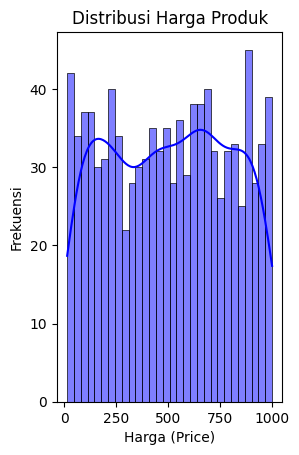

In [7]:
# Histogram Harga Produk
plt.subplot(1, 2, 1)
sns.histplot(df["Price"], bins=30, kde=True, color="blue")
plt.title("Distribusi Harga Produk")
plt.xlabel("Harga (Price)")
plt.ylabel("Frekuensi")

Text(0, 0.5, 'Frekuensi')

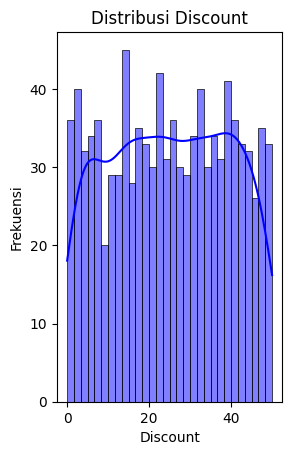

In [8]:
# Histogram discount
plt.subplot(1, 2, 1)
sns.histplot(df["Discount"], bins=30, kde=True, color="blue")
plt.title("Distribusi Discount")
plt.xlabel("Discount")
plt.ylabel("Frekuensi")

Text(0, 0.5, 'Frekuensi')

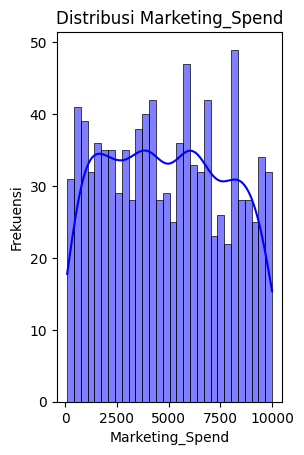

In [9]:
# Histogram Marketing_Spend
plt.subplot(1, 2, 1)
sns.histplot(df["Marketing_Spend"], bins=30, kde=True, color="blue")
plt.title("Distribusi Marketing_Spend")
plt.xlabel("Marketing_Spend")
plt.ylabel("Frekuensi")

Text(0, 0.5, 'Frekuensi')

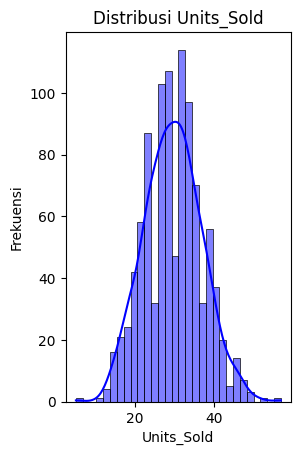

In [10]:
# Histogram Units_Sold
plt.subplot(1, 2, 1)
sns.histplot(df["Units_Sold"], bins=30, kde=True, color="blue")
plt.title("Distribusi Units_Sold")
plt.xlabel("Units_Sold")
plt.ylabel("Frekuensi")

In [11]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [12]:
# Mencari nilai unik dari kolom kategorik
product_categories = df["Product_Category"].unique()
customer_segments = df["Customer_Segment"].unique()

# Menampilkan hasil
print("Kategori Produk Unik:", product_categories)
print("Segmen Pelanggan Unik:", customer_segments)

# Menghitung jumlah nilai unik
num_product_categories = df["Product_Category"].nunique()
num_customer_segments = df["Customer_Segment"].nunique()

print(f"\nJumlah Kategori Produk Unik: {num_product_categories}")
print(f"Jumlah Segmen Pelanggan Unik: {num_customer_segments}")

Kategori Produk Unik: ['Sports' 'Toys' 'Home Decor' 'Fashion' 'Electronics']
Segmen Pelanggan Unik: ['Occasional' 'Premium' 'Regular']

Jumlah Kategori Produk Unik: 5
Jumlah Segmen Pelanggan Unik: 3


C:\Users\ACER\AppData\Local\Temp\ipykernel_7776\4173622797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Product_Category", palette="viridis", order=df["Product_Category"].value_counts().index)


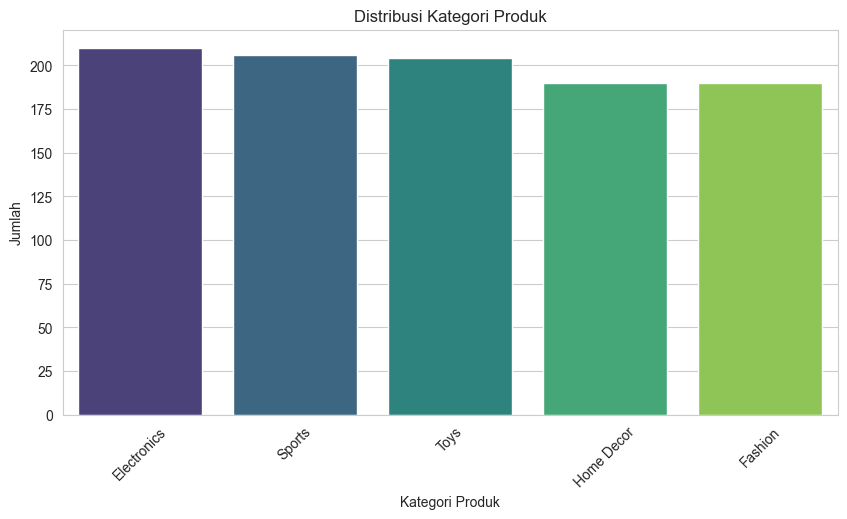

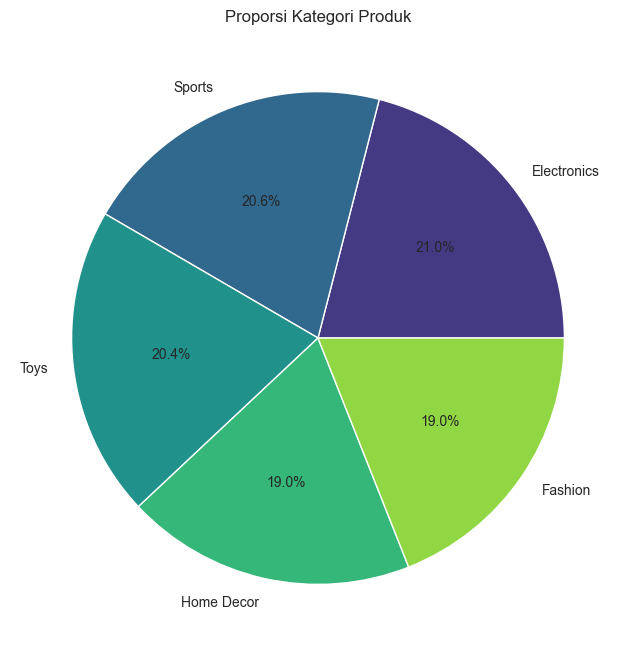

In [13]:
# 🎨 Set style seaborn
sns.set_style("whitegrid")

# 📌 Countplot untuk Product_Category
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Product_Category", palette="viridis", order=df["Product_Category"].value_counts().index)
plt.title("Distribusi Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

# 📌 Pie Chart untuk Product_Category
plt.figure(figsize=(8, 8))
df["Product_Category"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("viridis", len(df["Product_Category"].unique())))
plt.title("Proporsi Kategori Produk")
plt.ylabel("")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_7776\1925487948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Customer_Segment", palette="coolwarm", order=df["Customer_Segment"].value_counts().index)


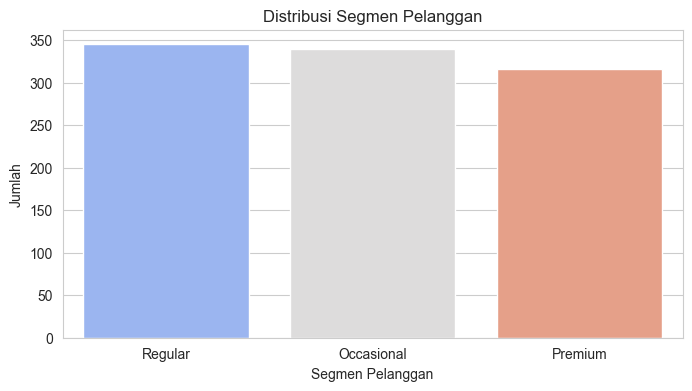

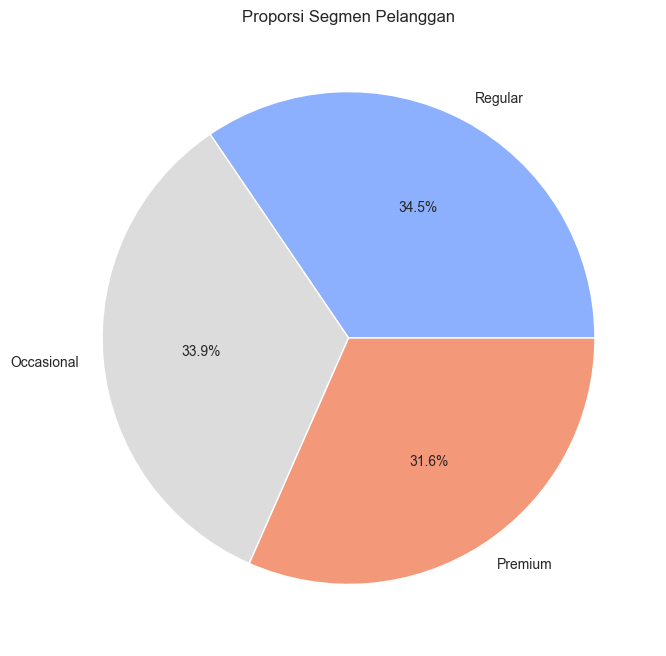

In [14]:
# 📌 Countplot untuk Customer_Segment
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Customer_Segment", palette="coolwarm", order=df["Customer_Segment"].value_counts().index)
plt.title("Distribusi Segmen Pelanggan")
plt.xlabel("Segmen Pelanggan")
plt.ylabel("Jumlah")
plt.show()

# 📌 Pie Chart untuk Customer_Segment
plt.figure(figsize=(8, 8))
df["Customer_Segment"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(df["Customer_Segment"].unique())))
plt.title("Proporsi Segmen Pelanggan")
plt.ylabel("")
plt.show()

# 2. Eksplorasi Data dan Pra-pemrosesan

## 🛠️ **Menangani Missing Values (Jika Ada)**  

Sebelum membangun model machine learning, penting untuk memastikan bahwa dataset tidak memiliki **missing values** (nilai yang hilang). Missing values dapat menyebabkan bias dalam analisis dan memengaruhi performa model prediktif.  

Untuk menangani missing values, kita dapat melakukan langkah-langkah berikut:  
1. **Menampilkan jumlah missing values di setiap kolom**  
2. **Menghapus atau mengisi nilai yang hilang berdasarkan strategi yang sesuai**  
   - Menghapus baris/kolom dengan terlalu banyak missing values  
   - Mengisi nilai yang hilang dengan **mean/median** (untuk numerik) atau **modus** (untuk kategorikal)  

Berikut adalah kode untuk mengecek dan menangani missing values:

In [15]:
df. isnull().sum()

Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
dtype: int64

Berdasarkan output tersebut, dataset ini **tidak memiliki missing value**

### 🛠️ **Menangani Outlier**  

Outlier adalah data yang **berbeda secara signifikan** dari sebagian besar nilai lainnya dalam dataset. Dalam **regresi linear dan polinomial**, keberadaan outlier dapat mempengaruhi kinerja model dengan membuat **prediksi tidak akurat**. Oleh karena itu, penting untuk mengidentifikasi dan menangani outlier sebelum membangun model.  

### 📌 **Mengapa Outlier Perlu Diperiksa?**  
✅ Outlier dapat mempengaruhi **mean (rata-rata)** dan membuat model menjadi bias  
✅ Beberapa outlier mungkin merupakan **kesalahan data** yang perlu dihapus  
✅ Jika outlier merupakan **bagian dari pola alami**, maka harus ditangani dengan metode yang tepat  

### 🎯 **Interpretasi Outlier**  
- Jika persentase outlier sangat tinggi (**>10%**), perlu dianalisis lebih lanjut:  
  - Apakah itu kesalahan input data?  
  - Apakah outlier merupakan bagian dari pola alami?  
  - Apakah perlu dilakukan **transformasi data atau normalisasi** untuk menguranginya?  

### 🖥️ **Mengklasifikasikan Kolom Numerik dan Kategorikal**  

Sebelum mendeteksi outlier, kita perlu mengidentifikasi kolom mana yang termasuk **numerik** dan **kategorikal**. 

In [16]:
def classify_columns(df):
    """
    Mengklasifikasikan kolom kedalam jenis numerical, dan categorical.
    """
    binary_cols = []
    numerical_cols = []
    categorical_cols = []

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']: 
            numerical_cols.append(col)
        elif df[col].dtype == 'object' or df[col].dtype.name == 'category':  
            categorical_cols.append(col)

    return numerical_cols, categorical_cols

numerical_cols, categorical_cols = classify_columns(df)

### 📊 **Visualisasi Outlier dengan Boxplot**  

Boxplot membantu dalam mendeteksi outlier dengan menunjukkan distribusi data, termasuk **minimum, maksimum, median, kuartil pertama (Q1), dan kuartil ketiga (Q3)**. 

Selanjutnya, kita akan membuat plot **boxplot** untuk memvisualisasikan distribusi data pada setiap atribut numerik. Dengan menggunakan boxplot, kita dapat melihat beberapa informasi penting, salah satunya mendeteksi adanya **outlier** yang mungkin mempengaruhi analisis dan pelatihan model.

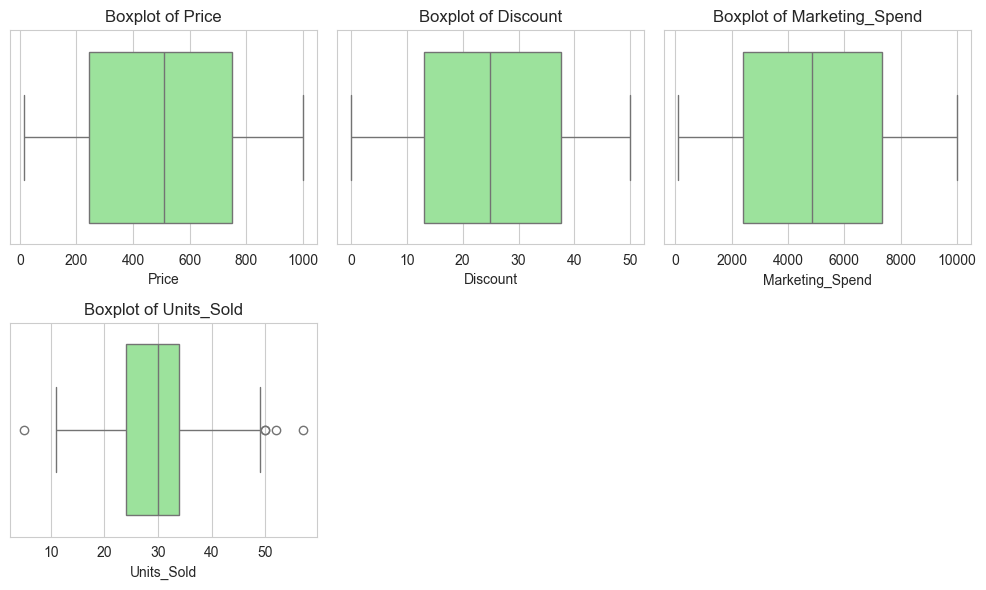

In [17]:
def plot_boxplot(df, numerical_cols):
    """
    Plot boxplots for numerical features to visualize the distribution and detect outliers.
    """
    
    num_plots = len(numerical_cols)
    num_rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(10, num_rows * 3))
    axes = axes.flatten() 
    
    for i, col in enumerate(numerical_cols):
        sns.boxplot(x=df[col], color='lightgreen', ax=axes[i])
        axes[i].set_title(f"Boxplot of {col}")
        axes[i].set_xlabel(col)
    
    for i in range(num_plots, len(axes)):
        axes[i].axis('off') 
    
    plt.tight_layout()
    plt.show()

plot_boxplot(df, numerical_cols)

### 📊 **Menghitung Persentase Outlier dengan IQR (Interquartile Range)**  

Metode **IQR (Interquartile Range)** digunakan untuk mendeteksi outlier berdasarkan kuartil pertama (**Q1**) dan kuartil ketiga (**Q3**).  
- **Outlier didefinisikan** sebagai nilai di bawah **Q1 - 1.5 * IQR** atau di atas **Q3 + 1.5 * IQR**.  
- Persentase outlier dihitung berdasarkan **jumlah data yang berada di luar batas tersebut**.  

Untuk bisa mengetahui lebih jelas mengenai jumlah outlier yang terdapat pada masing-masing atribut, kita akan menghitung persentase **outlier** untuk setiap atribut numerik menggunakan metode **Interquartile Range (IQR)**. Dengan cara ini, kita dapat mengetahui sejauh mana data pada masing-masing atribut memiliki nilai ekstrim yang dapat mempengaruhi analisis dan pelatihan model.

In [18]:
def calculate_outliers(df, column):
    """
    Menghitung persentase outlier pada suatu fitur menggunakan metode IQR.
    """
    # Menghitung Q1 (kuartil pertama), Q3 (kuartil ketiga), dan IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menentukan jumlah outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Menghitung persentase outlier
    percentage_outliers = (len(outliers) / len(df)) * 100
    
    return percentage_outliers

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    percentage_outliers = calculate_outliers(df, col)
    print(f"{col}: {percentage_outliers:.2f}% outliers")

Price: 0.00% outliers
Discount: 0.00% outliers
Marketing_Spend: 0.00% outliers
Units_Sold: 0.50% outliers


Karena persentase outlier yang ada cukup kecil, kita memutuskan untuk **tidak menghapus outlier** dalam dataset ini dan akan melanjutkan proses normalisasi.

### 🛠️ **Normalisasi atau Standarisasi Data (Jika Diperlukan)**  

Dalam machine learning, **normalisasi** dan **standarisasi** digunakan untuk memastikan bahwa fitur numerik memiliki skala yang seragam, sehingga meningkatkan performa model.  

Untuk regresi, kita perlu memahami dua pendekatan utama:  
1. **Normalisasi (Min-Max Scaling)** → Cocok untuk **Regresi Linear**  
   - Mengubah nilai fitur ke rentang **0 hingga 1** atau **-1 hingga 1**  
   - Berguna jika data memiliki **distribusi tidak normal atau memiliki outlier**  
2. **Standarisasi (Z-Score Scaling)** → Cocok untuk **Regresi Polinomial**  
   - Mengonversi data agar memiliki **mean = 0** dan **standar deviasi = 1**  
   - Membantu saat menggunakan **transformasi polinomial**, karena mengurangi efek perbedaan skala antara fitur  

Berikut adalah implementasi kodenya:  

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Normalisasi (Min-Max Scaling) untuk Regresi Linear
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

# Standarisasi (Z-Score Scaling) untuk Regresi Polinomial
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])

# Menampilkan hasil
print("Data setelah Normalisasi (Min-Max):\n", df_normalized.head())
print("\nData setelah Standarisasi (Z-Score):\n", df_standardized.head())

Data setelah Normalisasi (Min-Max):
          Date Product_Category     Price  Discount Customer_Segment  \
0  01-01-2023           Sports  0.932354  0.717491       Occasional   
1  02-01-2023             Toys  0.563437  0.071929          Premium   
2  03-01-2023       Home Decor  0.695643  0.071128          Premium   
3  04-01-2023             Toys  0.922677  0.012022          Premium   
4  05-01-2023             Toys  0.706294  0.958125          Premium   

   Marketing_Spend  Units_Sold  
0         0.675075    0.519231  
1         0.677821    0.211538  
2         0.373268    0.423077  
3         0.942107    0.461538  
4         0.167405    0.230769  

Data setelah Standarisasi (Z-Score):
          Date Product_Category     Price  Discount Customer_Segment  \
0  01-01-2023           Sports  1.476139  0.755245       Occasional   
1  02-01-2023             Toys  0.221781 -1.477181          Premium   
2  03-01-2023       Home Decor  0.671295 -1.479952          Premium   
3  04-01-2023  

### 📌 **Penjelasan Kode**
✅ **`MinMaxScaler()`** → Mengubah nilai fitur ke rentang **0 hingga 1**, cocok untuk **Regresi Linear**  
✅ **`StandardScaler()`** → Mengubah nilai fitur agar memiliki **mean = 0** dan **std = 1**, cocok untuk **Regresi Polinomial**  
✅ **Menggunakan `.fit_transform()`** untuk menerapkan skala ke fitur numerik yang dipilih  

### 🛠️ **Encoding Data Kategorik**  

Dalam dataset, kita memiliki beberapa fitur kategorik seperti **Product_Category** dan **Customer_Segment** yang tidak dapat langsung digunakan dalam model machine learning berbasis angka. Oleh karena itu, kita perlu mengonversinya ke bentuk numerik menggunakan **Label Encoding** yang mengonversi setiap kategori menjadi angka unik (**0, 1, 2, ...**).  

In [22]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
encoder = LabelEncoder()

# Encode kolom kategorik secara langsung
for col in categorical_cols:
    df_normalized[col] = encoder.fit_transform(df_normalized[col])
    df_standardized[col] = encoder.fit_transform(df_standardized[col])

# Menampilkan hasil setelah encoding
print(df_normalized.head())
print(df_standardized.head())

   Date  Product_Category     Price  Discount  Customer_Segment  \
0     0                 3  0.932354  0.717491                 0   
1    33                 4  0.563437  0.071929                 1   
2    66                 2  0.695643  0.071128                 1   
3    99                 4  0.922677  0.012022                 1   
4   132                 4  0.706294  0.958125                 1   

   Marketing_Spend  Units_Sold  
0         0.675075    0.519231  
1         0.677821    0.211538  
2         0.373268    0.423077  
3         0.942107    0.461538  
4         0.167405    0.230769  
   Date  Product_Category     Price  Discount  Customer_Segment  \
0     0                 3  1.476139  0.755245                 0   
1    33                 4  0.221781 -1.477181                 1   
2    66                 2  0.671295 -1.479952                 1   
3    99                 4  1.443236 -1.684349                 1   
4   132                 4  0.707511  1.587382                 1 

### 🛠️ **Membuat Heatmap Korelasi**  

Korelasi antar fitur numerik dalam dataset sangat penting untuk memahami hubungan antar variabel. Dalam konteks **regresi**, kita ingin melihat bagaimana variabel-variabel numerik berkaitan satu sama lain dan mana yang memiliki hubungan kuat dengan **variabel target (misalnya, Units_Sold)**.  

### 📌 **Mengapa Heatmap Korelasi?**  
✅ Membantu mengidentifikasi fitur yang berkorelasi tinggi, sehingga bisa dilakukan **seleksi fitur**  
✅ Korelasi positif (+1) menunjukkan hubungan linear searah, sedangkan korelasi negatif (-1) menunjukkan hubungan berlawanan  
✅ Korelasi mendekati **0** berarti hubungan antar variabel sangat lemah  

### 🎯 **Interpretasi Heatmap**  
- **Korelasi mendekati 1** → Variabel memiliki hubungan positif yang kuat  
- **Korelasi mendekati -1** → Variabel memiliki hubungan negatif yang kuat  
- **Korelasi mendekati 0** → Tidak ada hubungan yang signifikan antara variabel  

Dari hasil heatmap, kita bisa menentukan fitur mana yang paling relevan untuk digunakan dalam **model regresi linear atau polinomial**.

Berikut adalah implementasi kodenya

StandardScaler


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


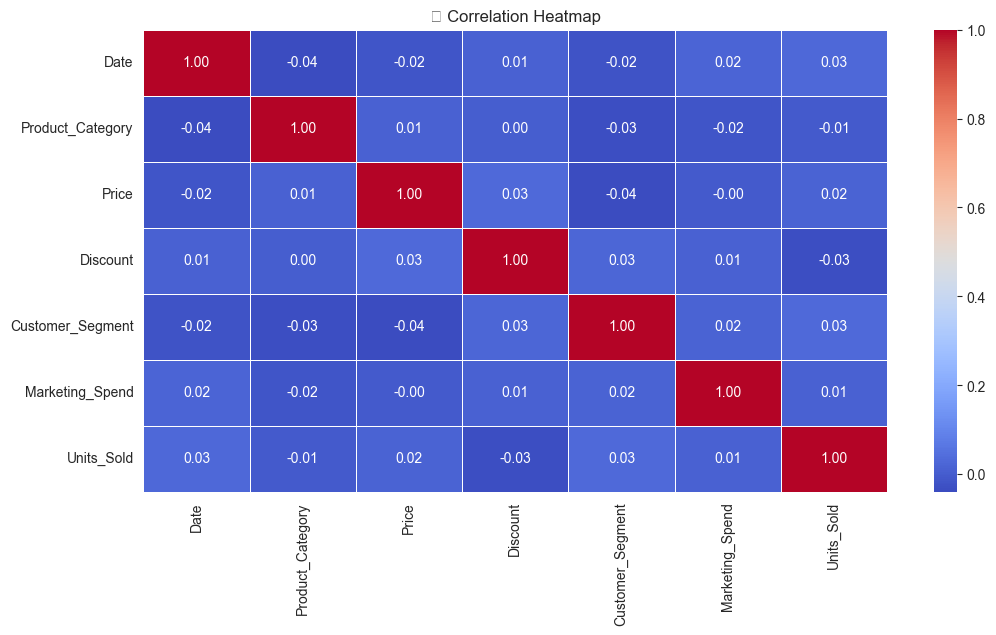

MinmaxScaler


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


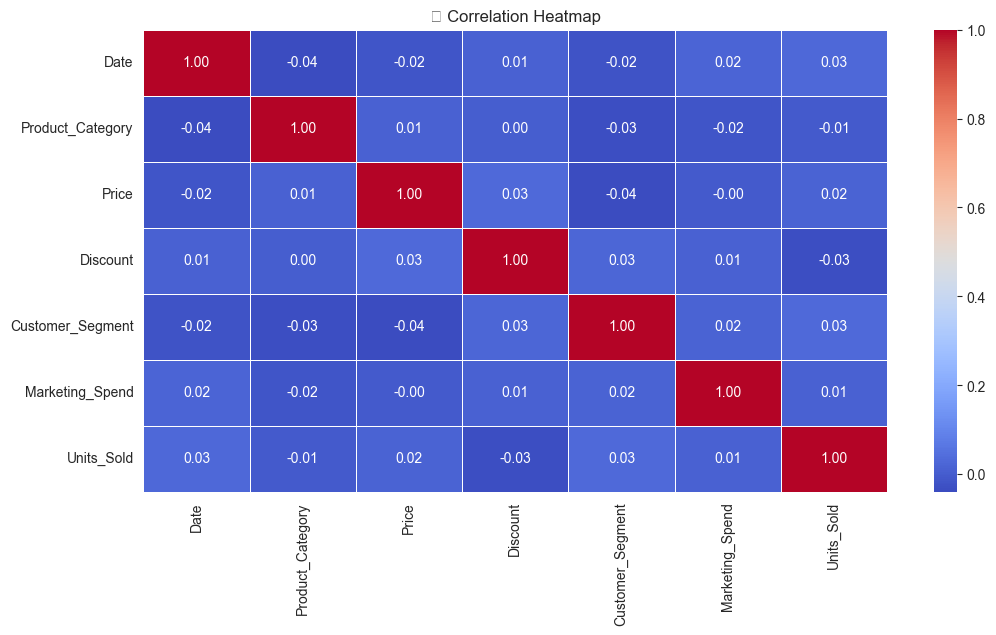

In [26]:
def plot_correlation_heatmap(df, numerical_cols):
    """
    Plot a heatmap to visualize the correlation between numerical features.
    """
    plt.figure(figsize=(12, 6))
    
    correlation_matrix = df[numerical_cols].corr() 
    
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("🔹 Correlation Heatmap")
    plt.show()

print("StandardScaler")
plot_correlation_heatmap(df_standardized, df_standardized.columns)
print("MinmaxScaler")
plot_correlation_heatmap(df_normalized, df_normalized.columns)

dapat dilihat baik menggunakan standarscaler maupun minmax scaler, karena target kita adalah Units_Sold maka corelasi yang paling tinggi adalah **Date** dan **Customer_Segment**.

3. Implementasi Model
- Membangun model Linear Regression dan Polynomial Regression.
- Memilih derajat polinomial yang sesuai dengan dataset.
- Menggunakan teknik validasi seperti train-test split atau cross-validation.

#  3. Implementasi Model  

Setelah melakukan **eksplorasi data** dan **penanganan outlier**, langkah selanjutnya adalah membangun model **Regresi Linear dan Regresi Polinomial** untuk memprediksi nilai target berdasarkan fitur-fitur yang tersedia.  

## 📌 **Membangun Model Linear Regression dan Polynomial Regression**  

Regresi digunakan untuk **memodelkan hubungan antara variabel independen (X) dan variabel dependen (y)**.  
- **Linear Regression** mencari hubungan **linear** antara variabel X dan y.  
- **Polynomial Regression** memperkenalkan **derajat polinomial** untuk menangkap pola yang lebih kompleks.  

### 🔹 **1. Model Linear Regression**  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Memisahkan fitur (X) dan target (y)
X = df_normalized.drop(columns=['Units_Sold', 'Date'])  
y = df_normalized['Units_Sold'] 

# Membagi dataset menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Memprediksi hasil
y_pred = linear_model.predict(X_test)

Mean Squared Error (MSE): 0.0203
Mean Absolute Error: 0.11
R-squared (R²): -0.0158


### 🔹 **2. Model Polynomial Regression**  

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Menentukan derajat polinomial
degree = 5  # Ganti sesuai dengan kebutuhan

# Mengubah fitur menjadi bentuk polinomial
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Membagi dataset menjadi training dan testing
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Membangun model Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Memprediksi hasil
y_pred_poly = poly_model.predict(X_test_poly)



Mean Squared Error (MSE) - Polynomial: 0.0270
Mean Absolute Error: 0.13
R-squared (R²) - Polynomial: -0.3500


4. Evaluasi Model
- Menggunakan metrik evaluasi seperti Mean Squared Error (MSE), R² Score, dan 
Mean Absolute Error (MAE).
- Membandingkan kinerja regresi linear dan polinomial.

# 4. Evaluasi Model

## 📊 **Evaluasi Model dengan Metrik MSE, R² Score, dan MAE**
Setelah membangun model **Linear Regression dan Polynomial Regression**, langkah selanjutnya adalah mengevaluasi performanya menggunakan beberapa metrik:

### 🔹 **Metrik Evaluasi**
1. **Mean Squared Error (MSE)**  
   - Mengukur rata-rata selisih kuadrat antara nilai aktual dan prediksi.  
   - Semakin kecil MSE, semakin baik modelnya.  
   - Rumus:  
     \[
     MSE = \frac{1}{n} \sum (y_{\text{actual}} - y_{\text{predicted}})^2
     \]
  
2. **Mean Absolute Error (MAE)**  
   - Mengukur rata-rata kesalahan absolut antara nilai aktual dan prediksi.  
   - Berbeda dengan MSE, MAE tidak mengkuadratkan selisih sehingga lebih **robust terhadap outlier**.  
   - Rumus:  
     \[
     MAE = \frac{1}{n} \sum |y_{\text{actual}} - y_{\text{predicted}}|
     \]

3. **R² Score (Koefisien Determinasi)**  
   - Mengukur seberapa baik model dapat menjelaskan variabilitas data.  
   - Semakin tinggi (mendekati 1), semakin baik modelnya.  
   - Jika R² terlalu tinggi pada Polynomial Regression, **cek kemungkinan overfitting**.

In [55]:
# Evaluasi model linear regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Mean Absolute Error: {mae:.2f}')
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.0203
Mean Absolute Error: 0.11
R-squared (R²): -0.0158


In [56]:
# Evaluasi model polinomial regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"Mean Squared Error (MSE) - Polynomial: {mse_poly:.4f}")
print(f'Mean Absolute Error: {mae_poly:.2f}')
print(f"R-squared (R²) - Polynomial: {r2_poly:.4f}")

Mean Squared Error (MSE) - Polynomial: 0.0270
Mean Absolute Error: 0.13
R-squared (R²) - Polynomial: -0.3500


## 🔥 **Membandingkan Kinerja Linear vs Polynomial Regression**
- Jika **Polynomial Regression memiliki R² yang lebih tinggi** tetapi **MSE juga meningkat drastis**, bisa jadi model mengalami **overfitting**.
- Jika **Linear Regression memiliki performa yang cukup baik dengan lebih sedikit error**, maka lebih disarankan.
- Bandingkan **MSE & MAE**—Polynomial Regression seharusnya memiliki **lebih kecil atau setidaknya setara** dengan Linear Regression jika memang lebih baik.

# 5. Analisis Hasil


- Menginterpretasikan koefisien regresi.
- Menyajikan grafik regression line dan polynomial fit.
- Menyimpulkan apakah model yang dibuat cukup baik dalam memprediksi target.

## 📊 **Analisis Hasil Model Regresi**
Setelah melakukan **evaluasi model**, langkah terakhir adalah **menganalisis hasil** untuk memahami seberapa baik model dalam memprediksi target.

### 🔹 **1. Interpretasi Koefisien Regresi**
- **Koefisien regresi** menunjukkan **seberapa besar pengaruh** setiap fitur terhadap target.
- Jika **koefisien positif**, maka kenaikan fitur akan meningkatkan nilai prediksi.  
- Jika **koefisien negatif**, maka kenaikan fitur akan menurunkan nilai prediksi.

In [ ]:
def interpret_coefficients(model, feature_names):
    """
    Menampilkan koefisien regresi untuk model linear.
    """
    print("📌 Interpretasi Koefisien Linear Regression:")
    for feature, coef in zip(feature_names, model.coef_):
        print(f"🔹 {feature}: {coef:.4f}")

interpret_coefficients(lr_model, X_train.columns)

### 🔹 **2. Menyajikan Grafik Regression Line dan Polynomial Fit**
- Untuk **Linear Regression**, kita akan menggambar **garis regresi sederhana**.  
- Untuk **Polynomial Regression**, kita akan menggambar **kurva yang sesuai dengan derajat polinomial**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Urutkan nilai X untuk plot polynomial agar lebih halus
X_sorted = np.sort(X_test, axis=0)
y_poly_pred_sorted = poly_model.predict(poly_features.transform(X_sorted))

plt.figure(figsize=(10, 5))

# Plot data asli
plt.scatter(X_test, y_test, color="blue", label="Actual Data")

# Plot garis regresi linear
plt.plot(X_test, y_pred_linear, color="red", label="Linear Regression")

# Plot kurva polynomial regression
plt.plot(X_sorted, y_poly_pred_sorted, color="green", linestyle="dashed", label=f"Polynomial Regression (Degree={degree})")

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Comparison: Linear vs Polynomial Regression")
plt.legend()
plt.show()


### 🔹 **3. Kesimpulan: Apakah Model Cukup Baik?**
1. **Lihat R² Score**  
   - Jika **Linear Regression memiliki nilai R² tinggi (~0.7 - 0.9)**, berarti model cukup baik.  
   - Jika **Polynomial Regression memiliki R² sangat tinggi (~0.99 - 1.0)**, cek kemungkinan **overfitting**.  

2. **Lihat MSE & MAE**  
   - Jika **Polynomial Regression memiliki MSE lebih rendah**, artinya lebih akurat.  
   - Jika **MSE terlalu rendah dan R² mendekati 1.0**, mungkin terlalu mengikuti noise data (**overfitting**).  

3. **Lihat Grafik**  
   - Jika **Linear Regression cukup mengikuti pola data**, maka sudah cukup.  
   - Jika **Polynomial Regression terlalu ekstrim melengkung**, maka kurang baik.

6. Laporan dan Presentasi
- Laporan dalam format PDF berisi seluruh hasil analisis dan implementasi.
- Slide presentasi per kelompok untuk menjelaskan hasil analisis.